In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading the dataset
data = pd.read_csv('C:\\DS_630_MachineLearning\\temperature_device_failure.csv')


In [2]:
# Check initial data info
print("Initial Data Summary:")
print(data.info())
print(data.describe())

# 1. Removing missing values (if any) - drop rows with any null values
data = data.dropna()

# Alternatively, you could fill missing values with the median or mean
# data['value'] = data['value'].fillna(data['value'].median())

# 2. Removing duplicates - keep only unique rows
data = data.drop_duplicates()

# 3. Removing rows with unrealistic or unwanted values
# value' represents temperature in Fahrenheit, let's remove rows with negative temperatures
data = data[data['value'] >= 0]

# Resetting the index after filtering
data = data.reset_index(drop=True)

# Check cleaned data
print("\nCleaned Data Summary:")
print(data.info())
print(data.describe())


Initial Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  7267 non-null   object 
 1   value      7267 non-null   float64
dtypes: float64(1), object(1)
memory usage: 113.7+ KB
None
             value
count  7267.000000
mean     71.242433
std       4.247509
min      57.458406
25%      68.369411
50%      71.858493
75%      74.430958
max      86.223213

Cleaned Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  7267 non-null   object 
 1   value      7267 non-null   float64
dtypes: float64(1), object(1)
memory usage: 113.7+ KB
None
             value
count  7267.000000
mean     71.242433
std       4.247509
min      57.458406
25%      68.369411
50%      71.858493
7

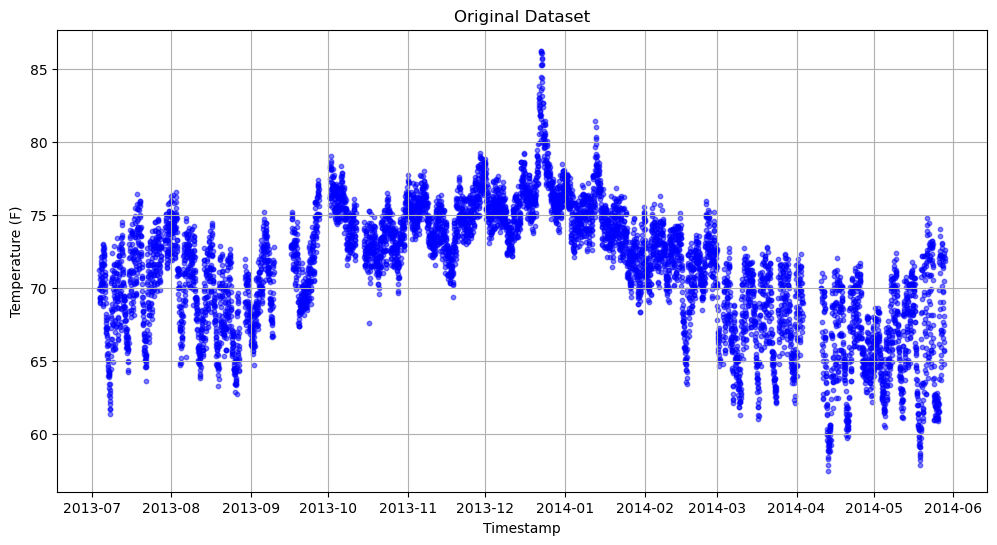

In [3]:
# Converting timestamp column to datetime format
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Visualizing the original dataset
plt.figure(figsize=(12, 6))
plt.scatter(data['timestamp'], data['value'], s=10, color='blue', alpha=0.5)
plt.title('Original Dataset')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (F)')
plt.grid(True)
plt.show()

In [4]:
# Extracting additional features from timestamp
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['DayOfWeek'] = data['timestamp'].dt.dayofweek
data['Hour'] = data['timestamp'].dt.hour
data['Day'] = data['timestamp'].dt.day

# Categorizing timestamps into different categories
def categorize_timestamp(row):
    if row['DayOfWeek'] < 5:
        if 7 <= row['Hour'] < 19:
            return 'Weekday Day'
        else:
            return 'Weekday Night'
    else:
        if 7 <= row['Hour'] < 19:
            return 'Weekend Day'
        else:
            return 'Weekend Night'

data['dtcat'] = data.apply(categorize_timestamp, axis=1)
print(data.head())


            timestamp      value  DayOfWeek  Hour  Day          dtcat
0 2013-07-04 00:00:00  69.880835          3     0    4  Weekday Night
1 2013-07-04 01:00:00  71.220227          3     1    4  Weekday Night
2 2013-07-04 02:00:00  70.877805          3     2    4  Weekday Night
3 2013-07-04 03:00:00  68.959400          3     3    4  Weekday Night
4 2013-07-04 04:00:00  69.283551          3     4    4  Weekday Night


C:\Users\survi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\survi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\survi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\survi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

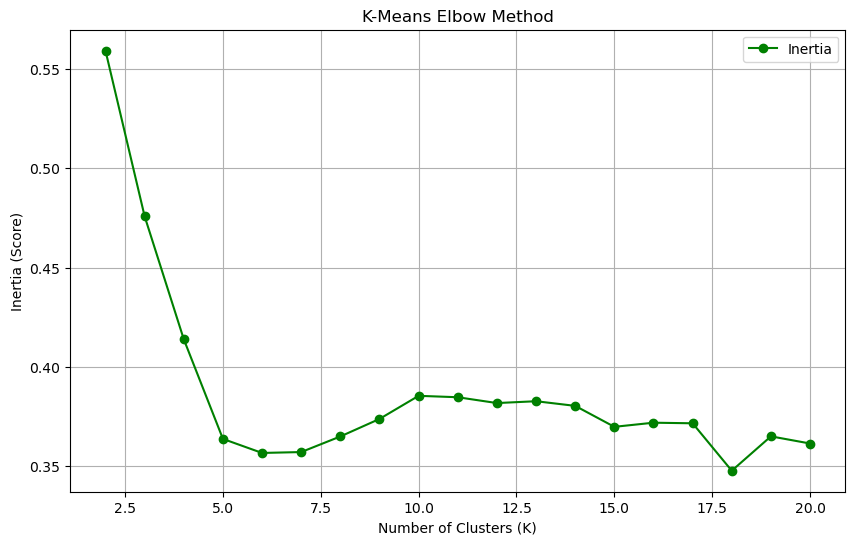

Best K based on Elbow Method: 18


In [5]:
# Importing necessary libraries
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Extracting features for clustering
X = data[['DayOfWeek', 'Hour']]

# Finding optimal number of clusters using the elbow method
scores = []
silhouette_scores = []

for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    scores.append(kmeans.inertia_)
    
    # Calculate silhouette score for each k (if k > 1)
    if k > 1:
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    else:
        silhouette_scores.append(None)  # No silhouette score for k=1


# Plotting the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(2, 21), silhouette_scores[1:], marker='o', color='green', label='Inertia')
plt.title('K-Means Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Score)')
plt.grid(True)
plt.legend()
plt.show()

# Determine best K based on the elbow method visually
# Looking for the K where the inertia starts to level off
best_k_inertia = None
min_slope = float('inf')
for k in range(2, len(scores)):
    slope = (scores[k - 2] - scores[k - 1]) / (k - 1)
    if slope < min_slope:
        min_slope = slope
        best_k_inertia = k



print(f"Best K based on Elbow Method: {best_k_inertia}")



C:\Users\survi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


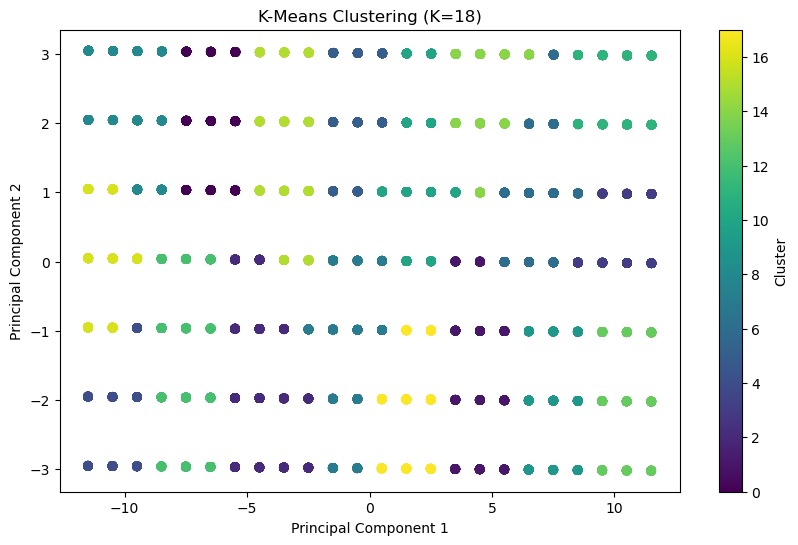

In [6]:
# Importing PCA for dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Extracting features for clustering
X = data[['DayOfWeek', 'Hour']]

# Applying PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Performing K-Means clustering with K=18
kmeans = KMeans(n_clusters=18, random_state=42)  # Set K to 18
kmeans.fit(X_pca)
cluster_labels = kmeans.predict(X_pca)

# Visualizing clusters in 2D space after PCA
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title('K-Means Clustering (K=18)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [7]:
# Calculating outliers fraction using the IQR method
Q1 = data['value'].quantile(0.25)
Q3 = data['value'].quantile(0.75)
IQR = Q3 - Q1
outliers_fraction_iqr = np.sum((data['value'] < (Q1 - 1.5 * IQR)) | (data['value'] > (Q3 + 1.5 * IQR))) / len(data)

print("Outliers fraction using IQR method:", outliers_fraction_iqr)


Outliers fraction using IQR method: 0.004816292830604101


Anomalies in Weekday Night:
               timestamp      value  DayOfWeek  Hour  Day          dtcat
3725 2013-12-23 00:00:00  85.326165          0     0   23  Weekday Night
3726 2013-12-23 01:00:00  85.705990          0     1   23  Weekday Night
6195 2014-04-14 00:00:00  58.832494          0     0   14  Weekday Night
6196 2014-04-14 01:00:00  60.184197          0     1   14  Weekday Night
6199 2014-04-14 04:00:00  59.541327          0     4   14  Weekday Night
6201 2014-04-14 06:00:00  59.202451          0     6   14  Weekday Night
6363 2014-04-21 00:00:00  60.296951          0     0   21  Weekday Night
6367 2014-04-21 04:00:00  59.843614          0     4   21  Weekday Night
7035 2014-05-19 00:00:00  58.423639          0     0   19  Weekday Night
7036 2014-05-19 01:00:00  57.861906          0     1   19  Weekday Night
7037 2014-05-19 02:00:00  58.639295          0     2   19  Weekday Night
7038 2014-05-19 03:00:00  59.074691          0     3   19  Weekday Night
7040 2014-05-19 05:00:0

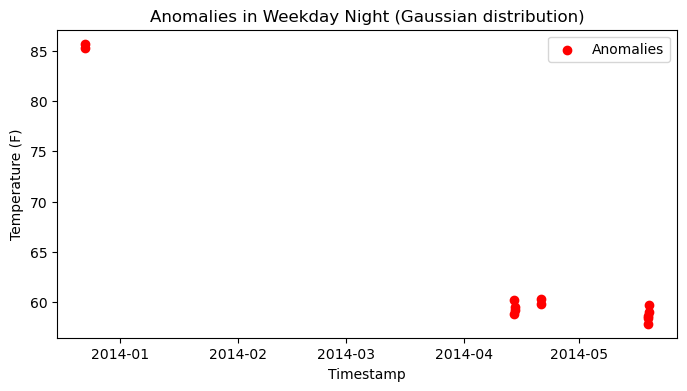

Anomalies in Weekday Day:
               timestamp      value  DayOfWeek  Hour  Day        dtcat
3564 2013-12-16 07:00:00  77.861362          0     7   16  Weekday Day
3732 2013-12-23 07:00:00  82.627288          0     7   23  Weekday Day
3733 2013-12-23 08:00:00  82.622298          0     8   23  Weekday Day
3734 2013-12-23 09:00:00  82.373437          0     9   23  Weekday Day
3735 2013-12-23 10:00:00  81.323119          0    10   23  Weekday Day
3756 2013-12-24 07:00:00  80.021830          1     7   24  Weekday Day
3757 2013-12-24 08:00:00  79.868159          1     8   24  Weekday Day
3758 2013-12-24 09:00:00  80.573021          1     9   24  Weekday Day
4236 2014-01-13 07:00:00  78.668126          0     7   13  Weekday Day
4237 2014-01-13 08:00:00  79.033601          0     8   13  Weekday Day
6202 2014-04-14 07:00:00  59.536298          0     7   14  Weekday Day
7042 2014-05-19 07:00:00  60.171092          0     7   19  Weekday Day
7043 2014-05-19 08:00:00  60.296682          0     

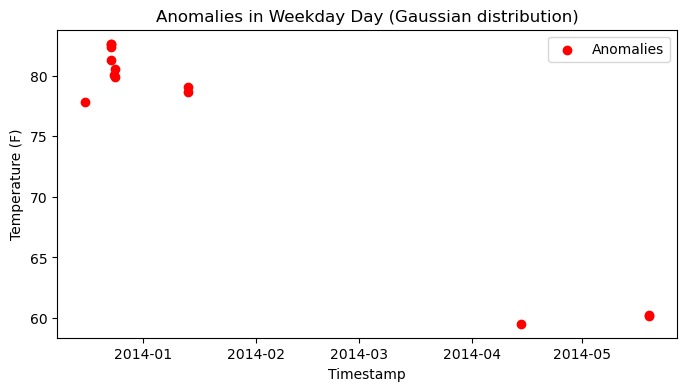

Anomalies in Weekend Night:
               timestamp      value  DayOfWeek  Hour  Day          dtcat
3556 2013-12-15 23:00:00  78.541518          6    23   15  Weekend Night
3700 2013-12-21 23:00:00  82.519659          5    23   21  Weekend Night
3723 2013-12-22 22:00:00  85.649437          6    22   22  Weekend Night
3724 2013-12-22 23:00:00  86.074710          6    23   22  Weekend Night
4228 2014-01-12 23:00:00  80.186576          6    23   12  Weekend Night


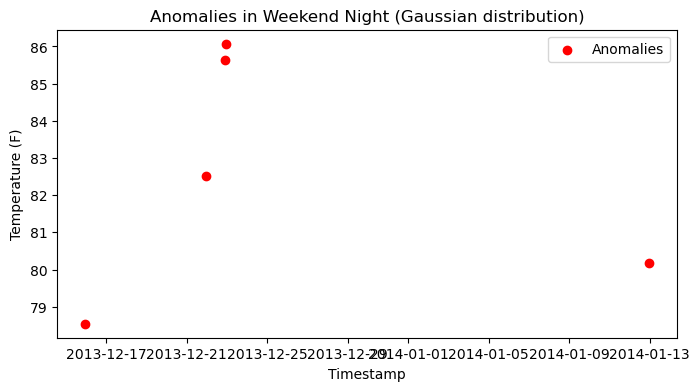

Anomalies in Weekend Day:
               timestamp      value  DayOfWeek  Hour  Day        dtcat
3709 2013-12-22 08:00:00  81.848025          6     8   22  Weekend Day
3710 2013-12-22 09:00:00  82.110758          6     9   22  Weekend Day
3717 2013-12-22 16:00:00  83.511630          6    16   22  Weekend Day
3718 2013-12-22 17:00:00  84.390932          6    17   22  Weekend Day
3719 2013-12-22 18:00:00  85.227685          6    18   22  Weekend Day


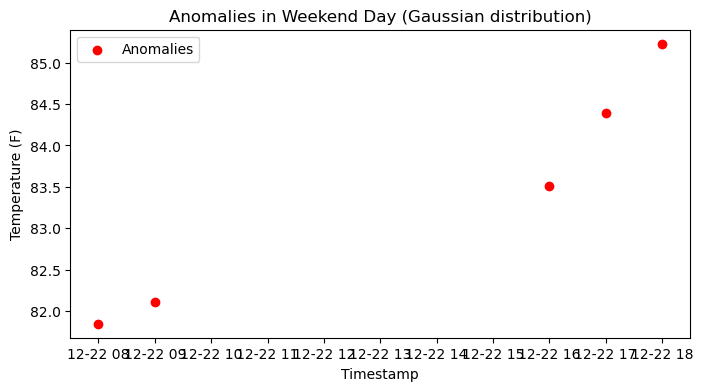

In [8]:
import matplotlib.pyplot as plt
from sklearn.covariance import EllipticEnvelope

# Function to detect anomalies using Gaussian distribution
def detect_anomalies_envelope(category):
    category_data = data[data['dtcat'] == category]
    X_anomaly = category_data[['DayOfWeek', 'Hour', 'value']]
    envelope = EllipticEnvelope(contamination=outliers_fraction_iqr)
    envelope.fit(X_anomaly)
    outliers = envelope.predict(X_anomaly)
    anomalies = category_data[outliers == -1]
    print(f"Anomalies in {category}:")
    print(anomalies)
    plt.figure(figsize=(8, 4))
    plt.scatter(anomalies['timestamp'], anomalies['value'], color='red', label='Anomalies')
    plt.title(f'Anomalies in {category} (Gaussian distribution)')
    plt.xlabel('Timestamp')
    plt.ylabel('Temperature (F)')
    plt.legend()
    plt.show()

# Detecting anomalies for each category
for category in data['dtcat'].unique():
    detect_anomalies_envelope(category)


Anomalies in Weekday Night:
               timestamp      value  DayOfWeek  Hour  Day          dtcat
3725 2013-12-23 00:00:00  85.326165          0     0   23  Weekday Night
3726 2013-12-23 01:00:00  85.705990          0     1   23  Weekday Night
3727 2013-12-23 02:00:00  84.086971          0     2   23  Weekday Night
3728 2013-12-23 03:00:00  85.222277          0     3   23  Weekday Night
3729 2013-12-23 04:00:00  83.653968          0     4   23  Weekday Night
3730 2013-12-23 05:00:00  84.329000          0     5   23  Weekday Night
3731 2013-12-23 06:00:00  83.118241          0     6   23  Weekday Night
3748 2013-12-23 23:00:00  80.243625          0    23   23  Weekday Night
6195 2014-04-14 00:00:00  58.832494          0     0   14  Weekday Night
6201 2014-04-14 06:00:00  59.202451          0     6   14  Weekday Night
7035 2014-05-19 00:00:00  58.423639          0     0   19  Weekday Night
7036 2014-05-19 01:00:00  57.861906          0     1   19  Weekday Night
7058 2014-05-19 23:00:0

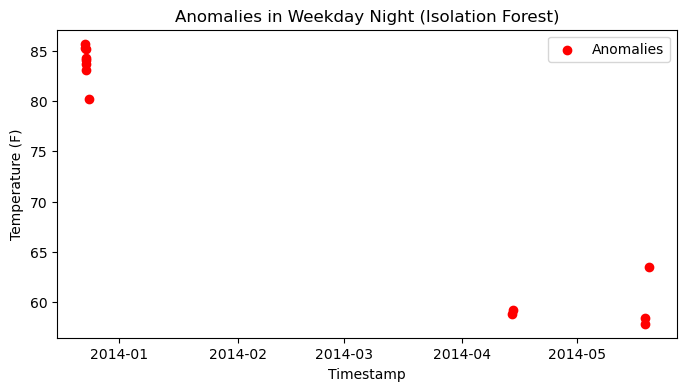

Anomalies in Weekday Day:
               timestamp      value  DayOfWeek  Hour  Day        dtcat
3732 2013-12-23 07:00:00  82.627288          0     7   23  Weekday Day
3733 2013-12-23 08:00:00  82.622298          0     8   23  Weekday Day
3734 2013-12-23 09:00:00  82.373437          0     9   23  Weekday Day
3741 2013-12-23 16:00:00  80.469549          0    16   23  Weekday Day
3743 2013-12-23 18:00:00  79.879531          0    18   23  Weekday Day
4236 2014-01-13 07:00:00  78.668126          0     7   13  Weekday Day
4237 2014-01-13 08:00:00  79.033601          0     8   13  Weekday Day
5479 2014-03-07 07:00:00  62.103566          4     7    7  Weekday Day
6130 2014-04-11 07:00:00  62.441949          4     7   11  Weekday Day
6202 2014-04-14 07:00:00  59.536298          0     7   14  Weekday Day
6370 2014-04-21 07:00:00  61.356241          0     7   21  Weekday Day
7042 2014-05-19 07:00:00  60.171092          0     7   19  Weekday Day
7210 2014-05-26 07:00:00  61.517325          0     

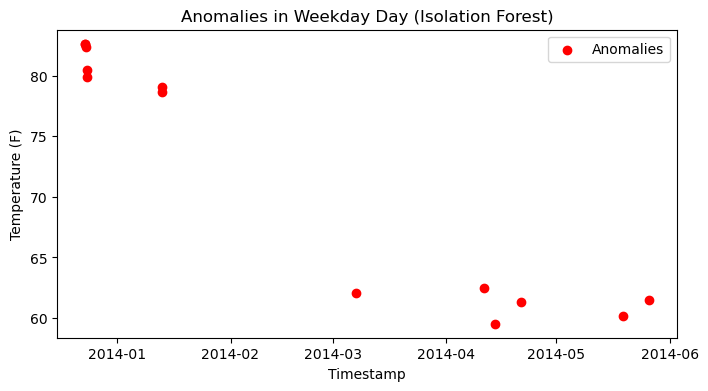

Anomalies in Weekend Night:
               timestamp      value  DayOfWeek  Hour  Day          dtcat
3720 2013-12-22 19:00:00  86.094888          6    19   22  Weekend Night
3721 2013-12-22 20:00:00  86.204189          6    20   22  Weekend Night
3722 2013-12-22 21:00:00  86.223213          6    21   22  Weekend Night
3723 2013-12-22 22:00:00  85.649437          6    22   22  Weekend Night
3724 2013-12-22 23:00:00  86.074710          6    23   22  Weekend Night


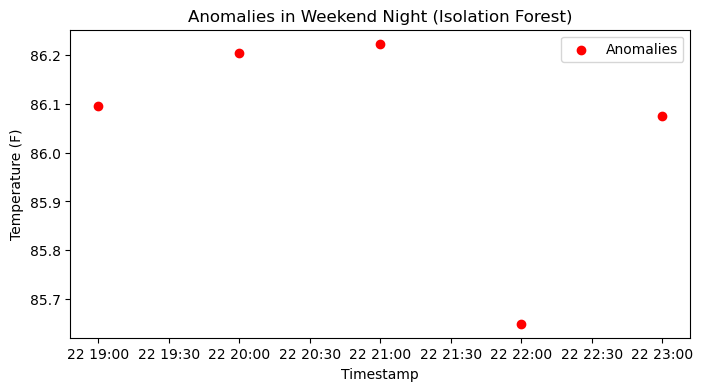

Anomalies in Weekend Day:
               timestamp      value  DayOfWeek  Hour  Day        dtcat
3708 2013-12-22 07:00:00  80.969986          6     7   22  Weekend Day
3717 2013-12-22 16:00:00  83.511630          6    16   22  Weekend Day
3718 2013-12-22 17:00:00  84.390932          6    17   22  Weekend Day
3719 2013-12-22 18:00:00  85.227685          6    18   22  Weekend Day
6178 2014-04-13 07:00:00  58.389522          6     7   13  Weekend Day


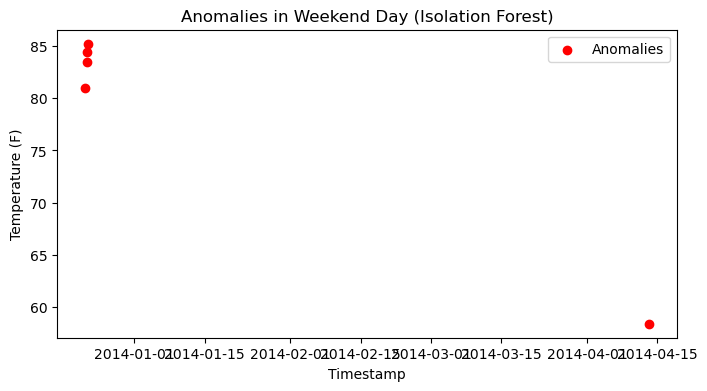

In [14]:
import matplotlib.pyplot as plt

from sklearn.ensemble import IsolationForest
# Function to detect anomalies using Isolation Forest
def detect_anomalies_isolation_forest(category):
    category_data = data[data['dtcat'] == category]
    X_anomaly = category_data[['DayOfWeek', 'Hour', 'value']]
    isolation_forest = IsolationForest(contamination=outliers_fraction_iqr, random_state=42)
    isolation_forest.fit(X_anomaly)
    outliers = isolation_forest.predict(X_anomaly)
    anomalies = category_data[outliers == -1]
    print(f"Anomalies in {category}:")
    print(anomalies)
    plt.figure(figsize=(8, 4))
    plt.scatter(anomalies['timestamp'], anomalies['value'], color='red', label='Anomalies')
    plt.title(f'Anomalies in {category} (Isolation Forest)')
    plt.xlabel('Timestamp')
    plt.ylabel('Temperature (F)')
    plt.legend()
    plt.show()

# Detecting anomalies for each category
for category in data['dtcat'].unique():
    detect_anomalies_isolation_forest(category)


In [9]:
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope


In [10]:
# Function to evaluate performance of anomaly detection models
def evaluate_anomaly_detection_performance():
    anomalies_count_envelope = 0
    anomalies_count_isolation_forest = 0

    for category in data['dtcat'].unique():
        category_data = data[data['dtcat'] == category]
        X_anomaly = category_data[['DayOfWeek', 'Hour', 'value']]
        envelope = EllipticEnvelope(contamination=outliers_fraction_iqr)
        envelope.fit(X_anomaly)
        outliers_envelope = envelope.predict(X_anomaly)
        anomalies_count_envelope += len(category_data[outliers_envelope == -1])
        isolation_forest = IsolationForest(contamination=outliers_fraction_iqr, random_state=42)
        isolation_forest.fit(X_anomaly)
        outliers_isolation_forest = isolation_forest.predict(X_anomaly)
        anomalies_count_isolation_forest += len(category_data[outliers_isolation_forest == -1])

    print("Total anomalies detected using Elliptic Envelope:", anomalies_count_envelope)
    print("Total anomalies detected using Isolation Forest:", anomalies_count_isolation_forest)

# Evaluating performance of anomaly detection models
evaluate_anomaly_detection_performance()


Total anomalies detected using Elliptic Envelope: 36
Total anomalies detected using Isolation Forest: 36
